# 선형회귀 데모

## 라이브러리 import 및 설정

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from matplotlib import pyplot as plt
from matplotlib import rcParams
import numpy as np
from pathlib import Path
import pandas as pd
import seaborn as sns
from tqdm.notebook import tqdm
import warnings

In [3]:
rcParams['figure.figsize'] = (16, 8)
plt.style.use('fivethirtyeight')
pd.set_option('max_columns', 100)
pd.set_option("display.precision", 4)
warnings.simplefilter('ignore')
np.set_printoptions(4)

## 학습데이터 로드

데이터는 [Dacon 단국대 소/중 데이터 분석 AI 경진대회 웹사이트](https://www.dacon.io/competitions/official/235638/data/)에서 다운로드 받아 `../input` 폴더에 저장.

In [4]:
data_dir = Path('../input/')
trn_file = data_dir / 'train.csv'
seed = 42
np.random.seed(seed)

In [5]:
trn = pd.read_csv(trn_file, index_col=0)
print(trn.shape)
trn.head()

(320000, 19)


,u,g,r,i,z,redshift,dered_u,dered_g,dered_r,dered_i,dered_z,nObserve,nDetect,airmass_u,airmass_g,airmass_r,airmass_i,airmass_z,class
id,,,,,,,,,,,,,,,,,,,
0,23.2640,20.3368,19.0095,17.6724,16.9396,-8.1086e-05,23.1243,20.2578,18.9551,17.6321,16.9089,18,18,1.1898,1.1907,1.1890,1.1894,1.1902,0
1,15.0521,14.0620,13.4524,13.2684,13.1689,4.5061e-03,14.9664,14.0045,13.4114,13.2363,13.1347,1,1,1.2533,1.2578,1.2488,1.2510,1.2555,1
2,16.7864,15.8254,15.5363,15.3935,15.3500,4.7198e-04,16.6076,15.6866,15.4400,15.3217,15.2961,2,2,1.0225,1.0241,1.0210,1.0217,1.0233,0
3,25.6606,21.1887,20.2212,19.8949,19.6346,5.8143e-06,25.3536,20.9947,20.0873,19.7947,19.5552,4,3,1.2054,1.2061,1.2049,1.2051,1.2057,0
4,24.4534,20.6992,19.0424,18.3242,17.9826,-3.3247e-05,23.7714,20.4338,18.8630,18.1903,17.8759,13,12,1.1939,1.1943,1.1937,1.1938,1.1941,0


In [6]:
X = trn[trn['class'] != 0][['u']].values
y = trn[trn['class'] != 0]['dered_u'].values
print(X.shape, y.shape)

(200004, 1) (200004,)


## NumPy를 이용한 역전파 학습

In [7]:
alpha = .001

n_input = 1
n_hidden = 2
n_output = 1

w1 = (np.random.rand(n_input, n_hidden) - .5) * .01
b1 = (np.random.rand(1, n_hidden) - .5) * .01

w2 = (np.random.rand(n_hidden, n_output) - .5) * .01
b2 = (np.random.rand(1, n_output) - .5) * .01

epoch = 5
print(f'w1: {w1}\nb1: {b1}\nw2: {w2}\nb2: {b2}')

w1: [[-0.0013  0.0045]]
b1: [[0.0023 0.001 ]]
w2: [[-0.0034]
 [-0.0034]]
b2: [[-0.0044]]


In [8]:
for i in tqdm(range(epoch)):
    idx = np.arange(len(y))
    np.random.shuffle(idx)
    for X_i, y_i in zip(X[idx[:100]], y[idx[:100]]):
        X_i = X_i.reshape(1, n_input)
        
        # forward pass
        z = X_i @ w1 + b1
        a = np.maximum(z, 0.)
        o = (a @ w2 + b2)[0][0]
        
        # backpropagation
        delta2 = o - y_i
        delta1 = (o - y_i) * w2.T
        delta1[z < 0.] = 0.
        
        w2 -= alpha * delta2 * a.T
        b2 -= alpha * delta2
        
        w1 -= alpha * X_i.T @ delta1
        b1 -= alpha * delta1

  0%|          | 0/5 [00:00<?, ?it/s]

In [9]:
print(z.shape, a.shape, o.shape, delta2.shape, delta1.shape)

(1, 2) (1, 2) () () (1, 2)


In [10]:
print(f'w1: {w1}\nb1: {b1}\nw2: {w2}\nb2: {b2}')

w1: [[-0.0013  0.9831]]
b1: [[0.0023 0.0529]]
w2: [[-0.0034]
 [ 0.9845]]
b2: [[0.4485]]


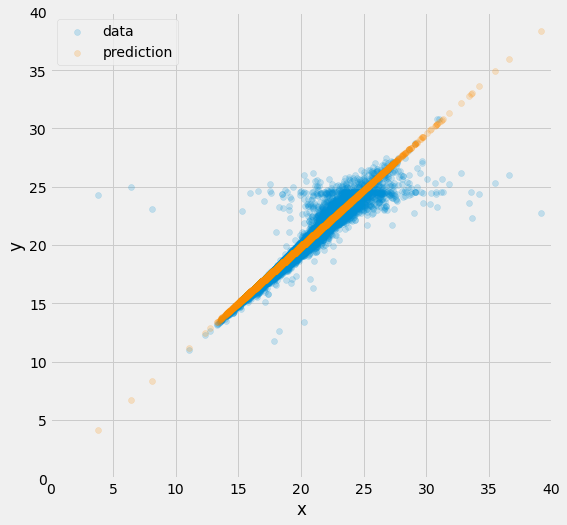

In [11]:
plt.figure(figsize=(8, 8))
plt.scatter(X, y, alpha=.2)
plt.scatter(X, np.maximum(X @ w1 + b1, 0.) @ w2 + b2, alpha=.2, color='darkorange')
plt.xlim(0, 40)
plt.ylim(0, 40)
plt.xlabel('x')
plt.ylabel('y')
plt.legend(['data', 'prediction'])